<h1>Correlation of inputs</h1>

In [2]:
!pip install scipy

    100% |████████████████████████████████| 16.6MB 73kB/s eta 0:00:01


In [60]:
import numpy
import scipy
import scipy.linalg   # SciPy Linear Algebra Library

In [61]:
# this is the correlation matrix between the 2 random input variables
K = scipy.array([[1,.4],[.4,1]])
K

array([[ 1. ,  0.4],
       [ 0.4,  1. ]])

In [62]:
# this is their cholesky decomposition matrix
G = scipy.linalg.cholesky(K, lower=True)
G

array([[ 1.        ,  0.        ],
       [ 0.4       ,  0.91651514]])

In [63]:
# check that G really is the cholesky decomposition; numpy.dot() gives the matrix multiplication
numpy.dot(G,G.transpose())

array([[ 1. ,  0.4],
       [ 0.4,  1. ]])

In [68]:
# monte carlo simulation
profits = []
for i in range(1,100000):
    sales = numpy.random.normal(1200,250)
    cm = numpy.random.normal(5,1)
    cp = numpy.random.normal(2,.25)
    tcm = numpy.dot(G,scipy.array([cm,cp]))[0]
    tcp = numpy.dot(G,scipy.array([cm,cp]))[1]
    profit = sales*(15-tcm-tcp-3)-4200
    profits.append(profit)

(array([  6.60000000e+01,   1.68500000e+03,   1.76140000e+04,
          3.97610000e+04,   2.86770000e+04,   9.86700000e+03,
          2.03400000e+03,   2.69000000e+02,   2.40000000e+01,
          2.00000000e+00]),
 array([ -7904.55933923,  -5951.31325693,  -3998.06717463,  -2044.82109233,
           -91.57501003,   1861.67107227,   3814.91715457,   5768.16323687,
          7721.40931917,   9674.65540147,  11627.90148377]),
 <a list of 10 Patch objects>)

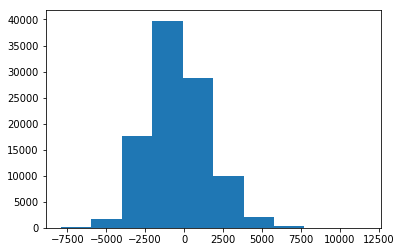

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(profits)